# Initial EDA to investigate the Business (Use-)Case

In [1]:
import numpy as np
import pandas as pd
import os
import glob

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Global plot modification
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')

#sns.set_theme(style="ticks", palette="pastel")

In [2]:
# Read data set
df = pd.read_csv('data/Kickstarter_cleaned.csv')

# Drop column
df = df.drop(['Unnamed: 0'], axis=1)

# Show head
df.head(2)

,backers_count,blurb,country,id,name,slug,state,usd_pledged,category_name,creator_name,location_name,location_state,created_at_rd,deadline_rd,launched_at_rd,state_changed_at_rd,usd_goal,duration_days,d_pledged_goal_usd
0,47,A colorful Dia de los Muertos themed oracle de...,US,928751314,The Ofrenda Oracle Deck,the-ofrenda-oracle-deck,successful,1950.0,Playing Cards,Lisa Vollrath,Euless,TX,Wed Aug 2 16:28:13 2017,Sat Sep 9 19:00:59 2017,Thu Aug 10 19:00:59 2017,Sat Sep 9 19:00:59 2017,1000.0,30.0,950.0
1,271,"Electra's long awaited, eclectic Debut Pop/Roc...",US,928014092,"Record Electra's Debut Album (Pop, Rock, Class...",record-electras-debut-album-pop-rock-classical,successful,22404.0,Rock,Electra,Hollywood,CA,Sun Sep 30 08:45:33 2012,Wed Jun 12 07:03:15 2013,Mon May 13 07:03:15 2013,Wed Jun 12 07:03:15 2013,15000.0,30.0,7404.0


In [3]:
# Define decimal places shown
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#df.shape
#df.info()
#df.isnull().sum().sort_values(ascending=False)

### Heatmap

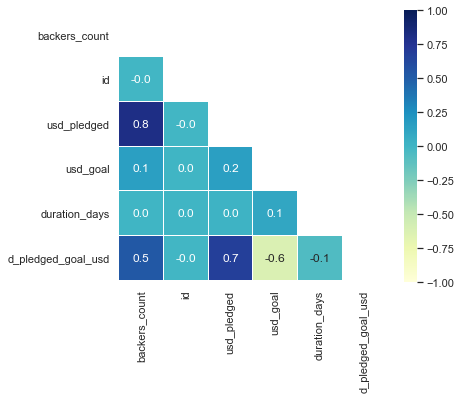

In [5]:
# Calculate correlations
corr = df.corr()

# Plot heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, center=0, vmin=-1,
                     square=True, annot=True, fmt='.1f', cmap='YlGnBu', linewidth=0.1);

### 'State'

In [6]:
#df.state.unique()

Text(0.5, 0, 'Project state')

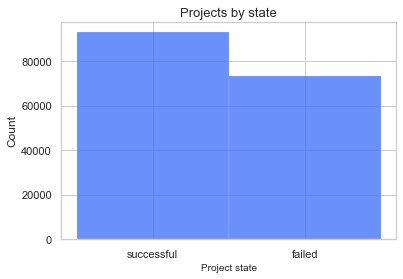

In [7]:
# Data selection
state = df.state

# Plotting
sns.histplot(state, linewidth=0.1);

# Formating
plt.title('Projects by state', fontsize=13)
plt.xlabel('Project state', fontsize=10)

In [8]:
# Boxplot success and failure of projects by category, country, etc.

### 'Category'

In [9]:
# Sort and count categories

#df.category_name.sort_values().unique()
#category_count = df.groupby('category_name')['id'].nunique().sort_values(ascending=False).iloc[0:10]

Text(0, 0.5, 'Category')

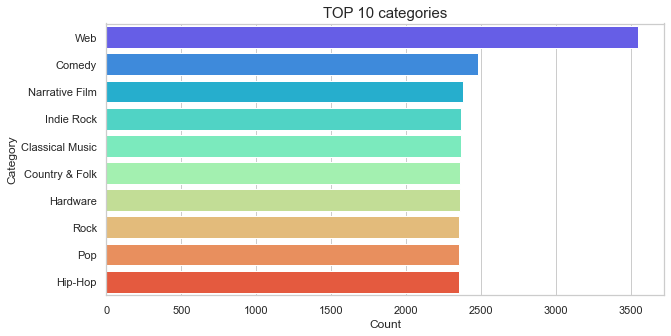

In [10]:
# Change dimension of the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting TOP 10
sns.countplot(y=df.category_name,
              order=df['category_name'].value_counts().sort_values(ascending=False).iloc[0:10].index,
             palette='rainbow');

# Formating
plt.title('TOP 10 categories', fontsize=15)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Category', fontsize = 12)

### 'Goal' & 'Pledged Amount'

In [11]:
#df.usd_pledged.unique()
#df.columns

(0.0, 17500.0)

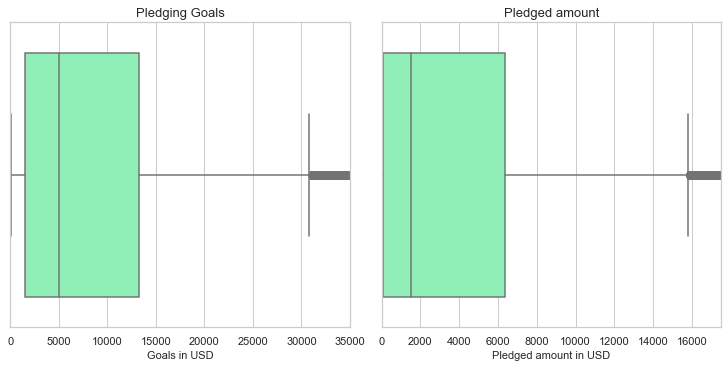

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)

# Plotting & Formating
sns.boxplot(x=df.usd_goal, palette='rainbow', ax=ax[0]);
ax[0].set_title('Pledging Goals', fontsize=13)
ax[0].set_xlabel('Goals in USD', fontsize=11)
ax[0].set_xlim(0, 35000)

sns.boxplot(x=df.usd_pledged, palette='rainbow', ax=ax[1]);
ax[1].set_title('Pledged amount', fontsize=13)
ax[1].set_xlabel('Pledged amount in USD', fontsize=11)
ax[1].set_xlim(0, 17500)

#### Distribution

/Users/michaelleder/opt/anaconda3/envs/kickstarter/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Goal')

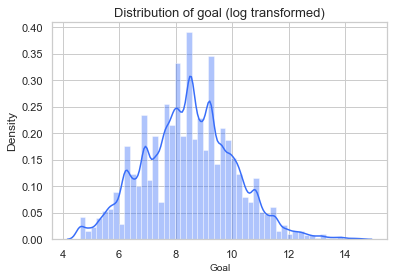

In [35]:
# Plotting
sns.distplot(a=df.usd_goal.apply(np.log));

# Formating
plt.title('Distribution of goal (log transformed)', fontsize=13)
plt.xlabel('Goal', fontsize=10)

In [31]:
df.usd_pledged

0

/Users/michaelleder/opt/anaconda3/envs/kickstarter/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'usd_pledged')

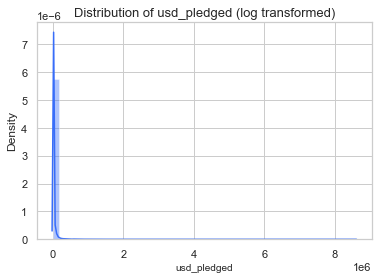

In [33]:
# Plotting
z = df.usd_pledged.astype(int)
sns.distplot(a=z);

# Formating
plt.title('Distribution of usd_pledged (log transformed)', fontsize=13)
plt.xlabel('usd_pledged', fontsize=10)
#plt.xscale('log')

### 'Country'

Text(0.5, 0, 'Country')

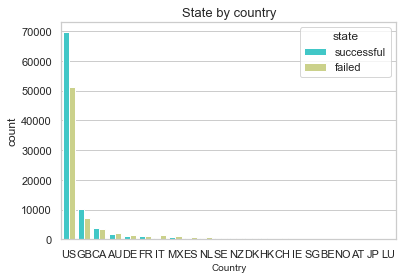

In [50]:
# df.country.value_counts()

# Plotting
sns.countplot(data=df, x='country', order=df['country'].value_counts().index,
              hue='state', palette='rainbow');

# Formating
plt.title('State by country', fontsize=13)
plt.xlabel('Country', fontsize=10)

### Time relation

In [ ]:
# Christmas vs. Summer // Summer, winter

#sns.lineplot(data=df, x='', y='')